<a href="https://colab.research.google.com/github/Ramvish108/Deep-Learning-With-ScikitLearn/blob/main/DBSCAN_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

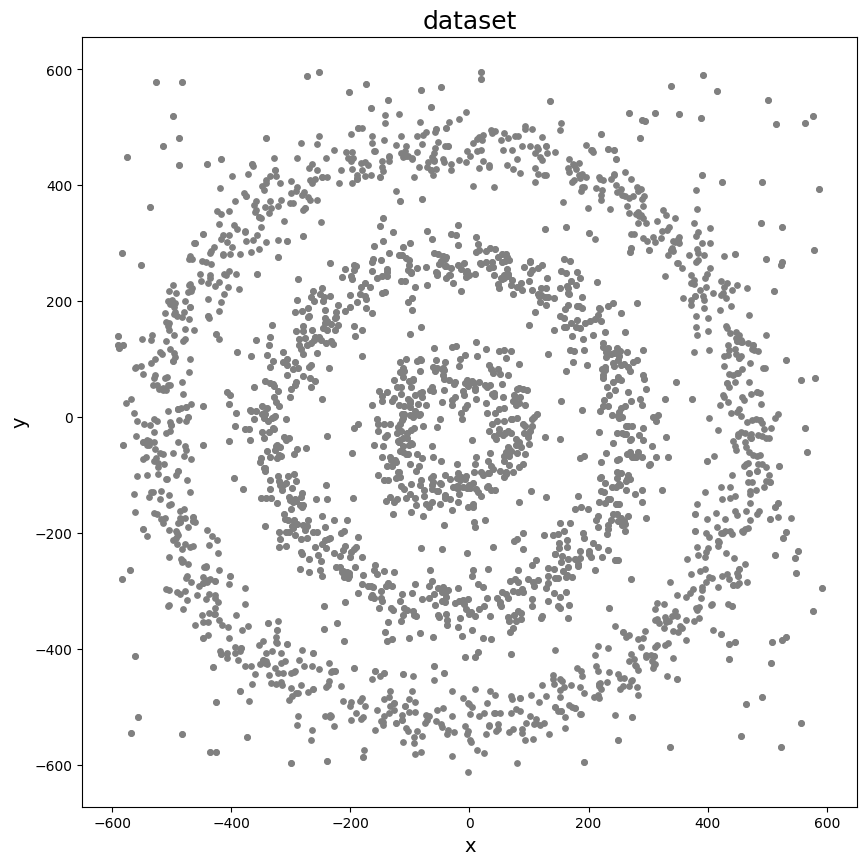

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(42)

def point(r,n=100):
    return[(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30))
    for x in range(1,n+1)]

df = pd.concat([df, pd.DataFrame(point(300,700))], ignore_index=True)
df = pd.concat([df, pd.DataFrame(point(100,300))], ignore_index=True)

df = pd.concat([df, pd.DataFrame([(np.random.randint(-600,600),
               np.random.randint(-600,600))
for i in range(300)])], ignore_index=True)

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('dataset',fontsize=18)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)

plt.show()




In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [10]:
df['KMEANS_LABELS']=kmeans.labels_

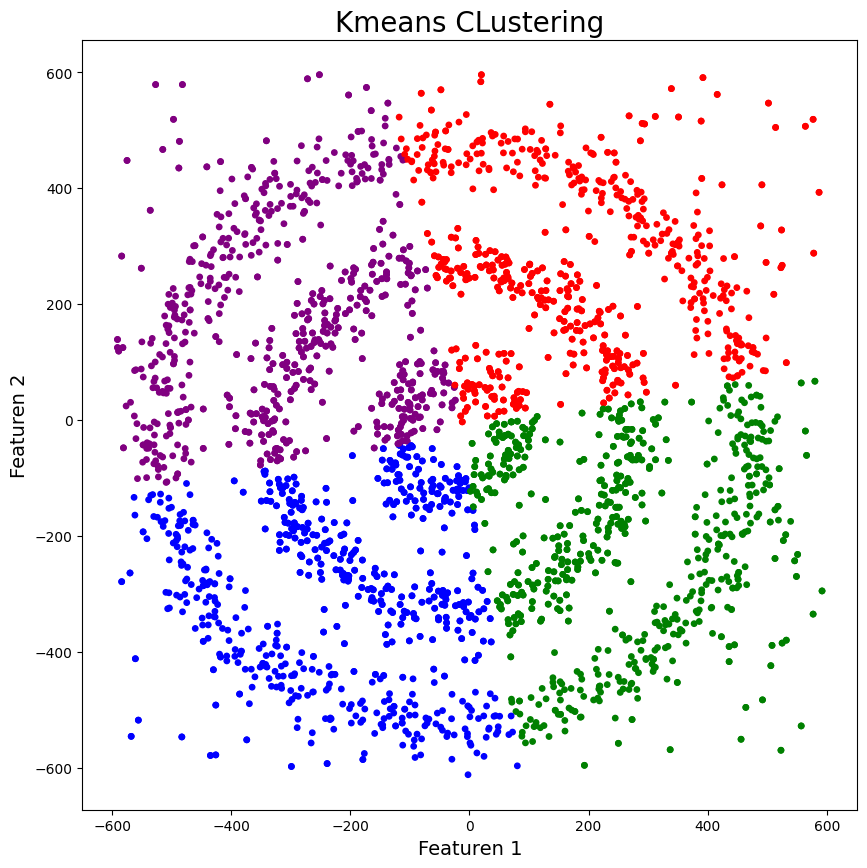

In [13]:
colours=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMEANS_LABELS'],cmap=matplotlib.colors.ListedColormap(colours),s=15)
plt.title('Kmeans CLustering', fontsize=20)
plt.xlabel('Featuren 1',fontsize=14)
plt.ylabel('Featuren 2',fontsize=14)
plt.show()

##Kmmeans clustering  is unable to find noise in the given datasets

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
model=AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

In [18]:
df['HR_Lables']=model.labels_

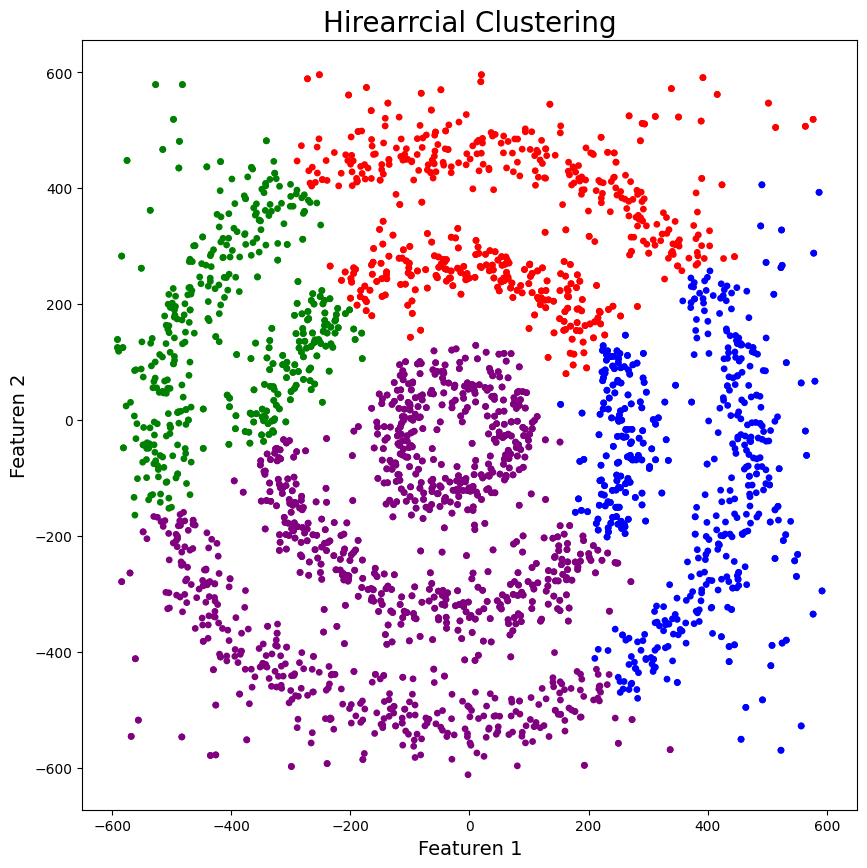

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_Lables'],cmap=matplotlib.colors.ListedColormap(colours),s=15)
plt.title('Hirearrcial Clustering', fontsize=20)
plt.xlabel('Featuren 1',fontsize=14)
plt.ylabel('Featuren 2',fontsize=14)
plt.show()

##Hirearcial clustering  is unable to find noise in the given datasets

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan=DBSCAN(eps=30,min_samples=6)
dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [23]:
df['DBSCAN_OPT_LABELS']=dbscan.labels_
df['DBSCAN_OPT_LABELS'].value_counts()

,count
DBSCAN_OPT_LABELS,
2,1486
0,1123
4,628
-1,298
8,10
9,9
10,8
3,8
1,6


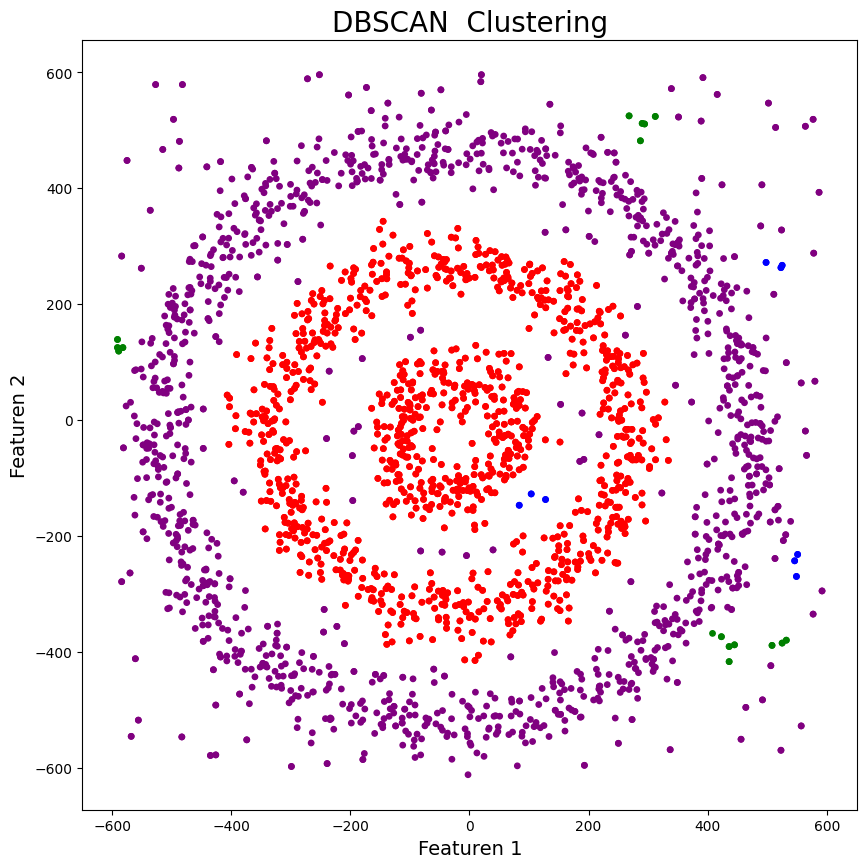

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_OPT_LABELS'],cmap=matplotlib.colors.ListedColormap(colours),s=15)
plt.title('DBSCAN  Clustering', fontsize=20)
plt.xlabel('Featuren 1',fontsize=14)
plt.ylabel('Featuren 2',fontsize=14)
plt.show()